In [11]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('../../')
import _redshift_richness_bins

sys.path.append('../../modeling/')
import CL_MASS_fit_alpha

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
Om_list = np.linspace(0.1, 0.6, 30)
colors = [
    "#87CEEB",  # Sky Blue
    "#FF7F50",  # Coral
    "#228B22",  # Forest Green
    "#FFD700",  # Gold
    "#708090",  # Slate Gray
    "#DC143C",  # Crimson
    "#9370DB",  # Medium Purple
    "#008080",  # Teal
    "#FF8C00",  # Dark Orange
    "#20B2AA"   # Light Sea Green
]

In [13]:
name = '../../cluster_mass_measurement/cluster_mass_measurement_vary_cosmology/cluster-masses_1-halo=nfw+c-M=None_rmin=1.0-rmax=3.5_photoz=Truez/fid_Om{}cluster-masses_1-halo=nfw+c-M=None_rmin=1.0-rmax=3.5_photoz=Truez.pkl'

In [14]:
Om_fid = 0.30
LogM10_cMNone_, LogM10_cMNone_err_ = CL_MASS_fit_alpha.store_log10M( _redshift_richness_bins.Z_bin, _redshift_richness_bins.Obs_bin, Om_list, name)

In [15]:
res = CL_MASS_fit_alpha.fit_Mass_Model(LogM10_cMNone_, LogM10_cMNone_err_, 
                                            _redshift_richness_bins.Z_bin,
                                       _redshift_richness_bins.Obs_bin, 
                                            Om_list, Om_fid,
                                            Om_range = [0.1, 0.6], merge_redshift=False)
log10M0, Alpha, log10M0_err, Alpha_err, sigma_log10M0, sigma_Alpha, sigma_log10M0_err, sigma_Alpha_err = res

In [16]:
res_merge = CL_MASS_fit_alpha.fit_Mass_Model(LogM10_cMNone_, LogM10_cMNone_err_, 
                                            _redshift_richness_bins.Z_bin,
                                       _redshift_richness_bins.Obs_bin, 
                                            Om_list, Om_fid,
                                            Om_range = [0.1, 0.6], merge_redshift=True)
log10M0_merge, Alpha_merge, log10M0_err_merge, Alpha_err_merge, sigma_log10M0_merge, sigma_Alpha_merge, sigma_log10M0_err_merge, sigma_Alpha_err_merge = res_merge



Text(0, 0.5, '$\\log_{10}M$')

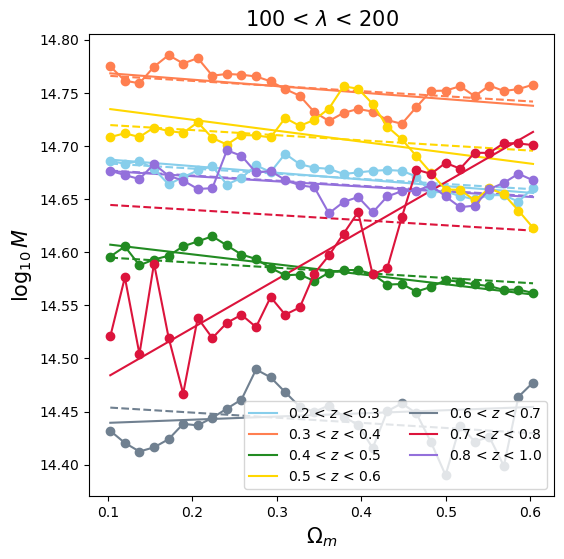

In [22]:
plt.figure(figsize=(6,6))
for i, richness_bin in enumerate(_redshift_richness_bins.Obs_bin):
    if i!=3: continue
    for j, z_bin in enumerate(_redshift_richness_bins.Z_bin):
        plt.plot([], [], color=colors[j], label = f'{z_bin[0]} < $z$ < {z_bin[1]}')
        plt.errorbar(Om_list + i*0.001, LogM10_cMNone_[i,j,:], fmt='-', marker='o', color = colors[j]  )
        y = log10M0[i,j] + Alpha[i,j]*(Om_list - Om_fid)
        plt.plot(Om_list + i*0.001, y, color = colors[j] )
        y_err = np.sqrt(log10M0_err[i,j]**2 + Alpha_err[i,j]**2*(Om_list - Om_fid)**2)
        #if i > 3:
        #    plt.fill_between(Om_list + i*0.001, y-y_err, y+y_err, color = colors[i], alpha=0.1)
        y = log10M0_merge[i,j] + Alpha_merge[i,j]*(Om_list - Om_fid)
        plt.plot(Om_list + i*0.001, y, '--', color = colors[j] )
        plt.title(f'{richness_bin[0]} < $\lambda$ < {richness_bin[1]}', fontsize=15)


plt.xlabel(r'$\Omega_m$', fontsize=15)
plt.legend(ncols=2)
#plt.ylim(-0.07, 0.07)
plt.ylabel(r'$\log_{10}M$', fontsize=15, rotation=90)

Text(0, 0.5, '$err(\\log_{10}M)$')

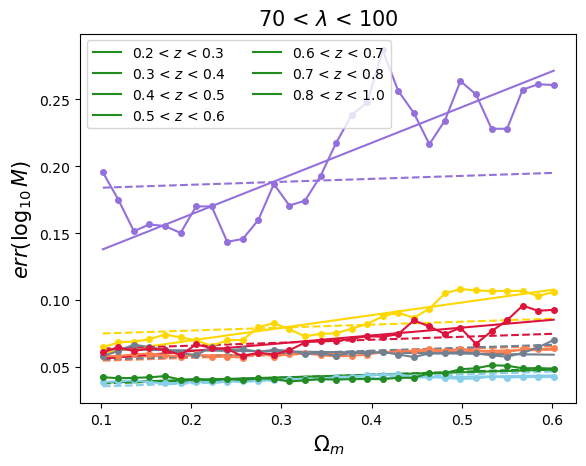

In [23]:
for i, richness_bin in enumerate(_redshift_richness_bins.Obs_bin):
    if i!=2: continue
    for j, z_bin in enumerate(_redshift_richness_bins.Z_bin):
        #if i > 2: continue
        plt.plot([], [], color=colors[i], label = f'{z_bin[0]} < $z$ < {z_bin[1]}')
        plt.errorbar(Om_list + i*0.001, LogM10_cMNone_err_[i,j,:], fmt='-', marker='o',markersize=4, color = colors[j]  )
        plt.plot(Om_list + i*0.001, 
                 sigma_log10M0[i,j] + sigma_Alpha[i,j]*(Om_list - Om_fid), color = colors[j] )

        plt.plot(Om_list + i*0.001, 
                 sigma_log10M0_merge[i,j] + sigma_Alpha_merge[i,j]*(Om_list - Om_fid),'--', color = colors[j] )
        
        plt.title(f'{richness_bin[0]} < $\lambda$ < {richness_bin[1]}', fontsize=15)


plt.xlabel(r'$\Omega_m$', fontsize=15)
plt.legend(ncols=2)
#plt.ylim(-0.07, 0.07)
plt.ylabel(r'$err(\log_{10}M)$', fontsize=15, rotation=90)

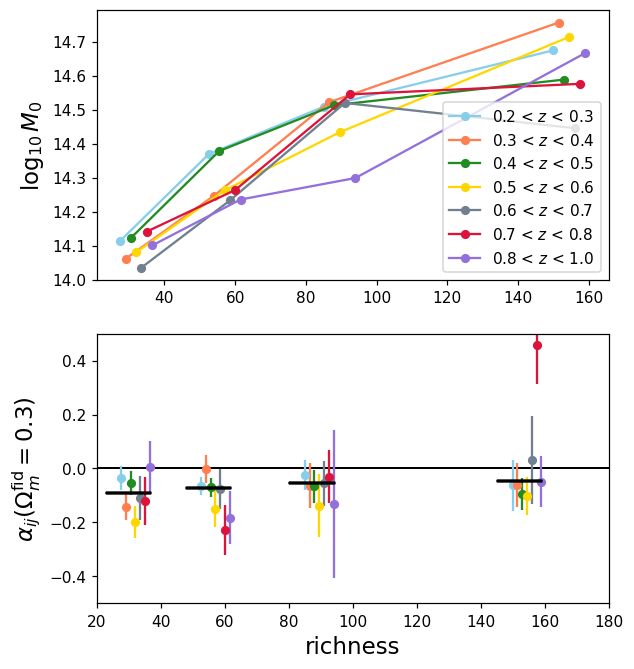

In [19]:
plt.figure(figsize=(6,7), dpi=110)
for j, z_bin in enumerate(_redshift_richness_bins.Z_bin):
    plt.subplot(211)
    plt.errorbar(_redshift_richness_bins.Obs_bin_center + 1.5*j, 
                 log10M0[:,j], label = f'{z_bin[0]} < $z$ < {z_bin[1]}',
                 marker='o', fmt='-',markersize=5,
                  color=colors[j])

    plt.legend()
    plt.ylabel(r'$\log_{10}M_0$', fontsize=15)
    plt.subplot(212)
    plt.errorbar(_redshift_richness_bins.Obs_bin_center + 1.5*j, 
                 Alpha[:,j], Alpha_err[:,j], 
                 marker='o', fmt=' ',markersize=5
                 , color=colors[j])

    x = np.linspace(_redshift_richness_bins.Obs_bin_center- 3*1.5, _redshift_richness_bins.Obs_bin_center + 1.5*6, 10)

    plt.plot(x, Alpha_merge[:,j] + 0*x, '-k', zorder=100)

    plt.ylim(-0.5, 0.5)
    plt.xlim(20, 180)
    x = np.linspace(0, 300, 10)
    plt.plot(x, 0+0*x, 'k',zorder=0, lw=1)
    plt.ylabel(r'$\alpha_{ij}(\Omega_m^{\rm fid}=0.3)$', fontsize=15)
    plt.xlabel(r'richness', fontsize=15)


In [26]:
-0.09/0.3

-0.3

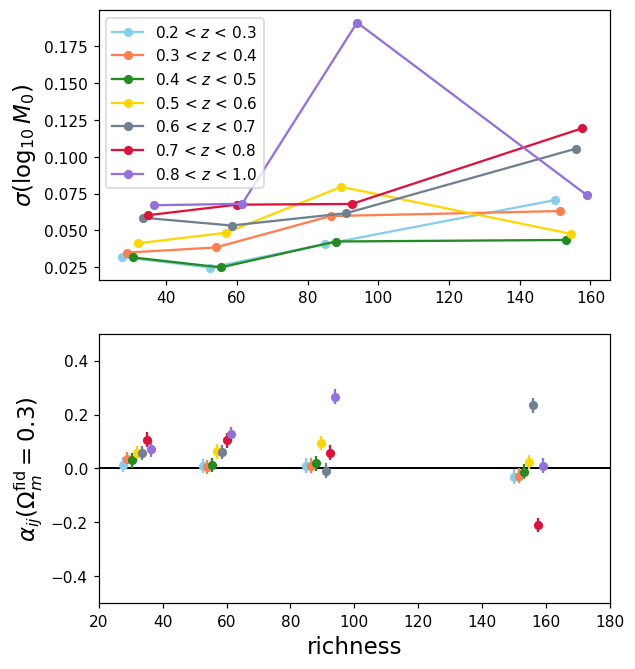

In [20]:
plt.figure(figsize=(6,7), dpi=110)
for j, z_bin in enumerate(_redshift_richness_bins.Z_bin):
    plt.subplot(211)
    plt.errorbar(_redshift_richness_bins.Obs_bin_center + 1.5*j, 
                 sigma_log10M0[:,j], label = f'{z_bin[0]} < $z$ < {z_bin[1]}',
                 marker='o', fmt='-',markersize=5, color=colors[j])

    plt.legend()
    plt.ylabel(r'$\sigma(\log_{10}M_0)$', fontsize=15)
    plt.subplot(212)
    plt.errorbar(_redshift_richness_bins.Obs_bin_center + 1.5*j, 
                 sigma_Alpha[:,j], sigma_Alpha_err[:,j], 
                 marker='o', fmt=' ', markersize=5, color=colors[j])

    plt.ylim(-0.5, 0.5)
    plt.xlim(20, 180)
    x = np.linspace(0, 300, 10)
    plt.plot(x, 0+0*x, 'k',zorder=0, lw=1)
    plt.ylabel(r'$\alpha_{ij}(\Omega_m^{\rm fid}=0.3)$', fontsize=15)
    plt.xlabel(r'richness', fontsize=15)

